In [300]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [301]:
class LinearRegressionCustom:
    def __init__(self, fit_intercept=False):
        self.coef = None
        self.fit_intercept = fit_intercept
        self.X_mean = 0
        self.y_mean = 0

    def fit(self, X, y, lamd = 0):
        if not  self.fit_intercept:
            self.X_mean = X.mean(axis=0)
            self.y_mean = y.mean()
            y = y - y.mean()
        X_ = np.c_[np.ones(X.shape[0]), X] if self.fit_intercept else X-self.X_mean

        self.coef = np.linalg.pinv(X_.T @ X_) @ X_.T @ y # normal equation
        # Ridge regularization
        if lamd != 0 :
            n_features = X_.shape[1]
            I = np.eye(n_features)

            if self.fit_intercept:
                I[0, 0] = 0  # do not regularize intercept
            self.coef = np.linalg.solve(X_.T @ X_ + lamd*np.eye(X_.shape[1]), X_.T @ y)

    def predict(self, X_test):
        X_test =  np.c_[np.ones(X_test.shape[0]), X_test] if self.fit_intercept else X_test-self.X_mean
        pred = X_test @ self.coef
        return pred if self.fit_intercept else pred + self.y_mean

    # def score(self, X_test, y_test):
    #     y_pred = self.predict(X_test)
    #
    #     # calculate r2 sore
    #     ss_res = np.sum((y_test - y_pred) ** 2) # residual error (l2 norm of the rejection vector )
    #     ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
    #     r2_score = 1 -ss_res / ss_tot
    #
    #
    #     # calculate rmse
    #     rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
    #     print(f"r2 score: {r2_score}, rmse: {rmse}")



In [302]:
data_file = 'data/cleaned_data.csv'

data = np.loadtxt(data_file, skiprows=1, delimiter=',')


Y = data[:, 0]      # First column as target

Y = np.log(Y)

X = data[:, 1:]     # All columns except the first as features

AREA_IDX = 0
X[:, AREA_IDX] = np.log(X[:, AREA_IDX])

In [303]:
X

array([[8.91193434, 4.        , 2.        , ..., 2.        , 1.        ,
        1.        ],
       [9.10052551, 4.        , 4.        , ..., 3.        , 0.        ,
        1.        ],
       [9.20633235, 3.        , 2.        , ..., 2.        , 1.        ,
        0.5       ],
       ...,
       [8.1942293 , 2.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [7.97590836, 3.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [8.25582843, 3.        , 1.        , ..., 0.        , 0.        ,
        0.        ]], shape=(545, 12))

In [304]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [305]:

scaler = StandardScaler()
regressor = LinearRegression(fit_intercept=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=8)
regressor.fit(X_train, y_train)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
regressor.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [306]:
print("sklearn Linear regression evaluation")
y_pred = regressor.predict(X_test)
print("r2 score: ",r2_score(y_test, y_pred),'\n', "RMSE: ", root_mean_squared_error(y_test, y_pred))

sklearn Linear regression evaluation
r2 score:  0.7703174423147716 
 RMSE:  0.1789320838748588


In [307]:
print("Custom linear regression evaluation: ")
reg_custom = LinearRegressionCustom(fit_intercept=True)
reg_custom.fit(X_train_scaled, y_train)

print("r2 score: ",r2_score(y_test, reg_custom.predict(X_test_scaled)),'\n',
      "RMSE: ", root_mean_squared_error(y_test,  reg_custom.predict(X_test_scaled)))

Custom linear regression evaluation: 
r2 score:  0.7703174423147656 
 RMSE:  0.17893208387486112


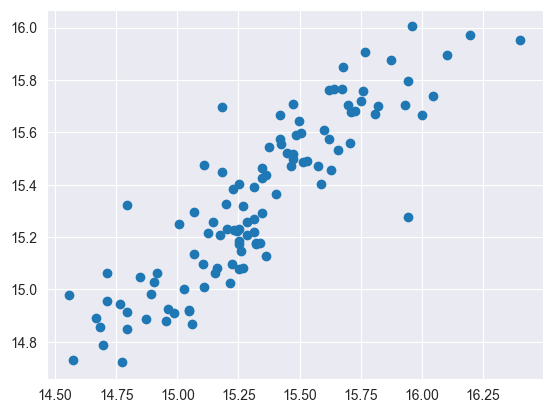

In [308]:
import  matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)